In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d nowke9/ipldata

  0% 0.00/1.20M [00:00<?, ?B/s]
100% 1.20M/1.20M [00:00<00:00, 40.0MB/s]


In [5]:
!ls

deliveries.csv	ipldata.zip  kaggle.json  matches.csv


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  ipldata.zip
replace deliveries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace matches.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [8]:
data=pd.read_csv('deliveries.csv')
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
data2= pd.read_csv('matches.csv')
data2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Let's go on now -**
**KKR V MI -  Q1**

In [10]:
data_f = data2.loc[data2.team1.isin(['Kolkata Knight Riders', 'Mumbai Indians'])] 
data_f = data_f.loc[data_f.team2.isin(['Kolkata Knight Riders', 'Mumbai Indians'])] 
data_f

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
52,53,2017,Kolkata,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi,NaN
57,58,2017,Bangalore,2017-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KV Sharma,M Chinnaswamy Stadium,NJ Llong,Nitin Menon,NaN
74,75,2008,Kolkata,2008-04-29,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,ST Jayasuriya,Eden Gardens,BF Bowden,AV Jayaprakash,NaN
98,99,2008,Mumbai,2008-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,SM Pollock,Wankhede Stadium,BR Doctrove,DJ Harper,NaN
131,132,2009,Port Elizabeth,2009-04-27,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,92,0,SR Tendulkar,St George's Park,BG Jerling,RB Tiffin,NaN
137,138,2009,East London,2009-05-01,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,JP Duminy,Buffalo Park,M Erasmus,SK Tarapore,NaN
190,191,2010,Mumbai,2010-03-22,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Mumbai Indians,0,7,SR Tendulkar,Brabourne Stadium,SS Hazare,SJA Taufel,NaN
229,230,2010,Kolkata,2010-04-19,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,bat,normal,0,Kolkata Knight Riders,0,9,M Kartik,Eden Gardens,BG Jerling,RE Koertzen,NaN
302,303,2011,Kolkata,2011-05-22,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,JEC Franklin,Eden Gardens,SK Tarapore,SJA Taufel,NaN


Finally , We have got a complete dataset for all the matches of  KXIP VS RCB 

**Let's do Q1 now**

MI Wins - 19
KKR Wins - 6


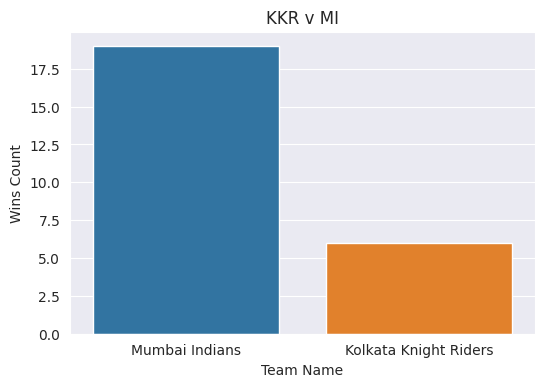

In [11]:
plt.figure(dpi=100)
sns.countplot(x='winner',data = data_f)
plt.ylabel('Wins Count')
plt.xlabel('Team Name')
plt.title('KKR v MI')
A,B =data_f.winner.value_counts()

print('MI Wins -',A)
print('KKR Wins -',B)

plt.show()


KKR has been performing very poorly against Mumbai Indians.

Let's go MI although I am KKR fan.

This season they made a record by loosing to an opponent 20 times in IPL.

Let's go with RCB now

**Let's do Q2 now**

**Finding average wicket lost in 6-15 overs**

In [16]:
data_n = data.loc[data.bowling_team.isin(['Kolkata Knight Riders'])]
data_n = data_n.loc[data.batting_team.isin(['Mumbai Indians'])]
data_n = data_n.loc[(data_n.over >=6) & (data_n.over<16)]
data_n

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1587,7,2,Mumbai Indians,Kolkata Knight Riders,6,1,PA Patel,JC Buttler,Kuldeep Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1588,7,2,Mumbai Indians,Kolkata Knight Riders,6,2,PA Patel,JC Buttler,Kuldeep Yadav,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
1589,7,2,Mumbai Indians,Kolkata Knight Riders,6,3,PA Patel,JC Buttler,Kuldeep Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1590,7,2,Mumbai Indians,Kolkata Knight Riders,6,4,JC Buttler,PA Patel,Kuldeep Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1591,7,2,Mumbai Indians,Kolkata Knight Riders,6,5,JC Buttler,PA Patel,Kuldeep Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178090,11347,2,Mumbai Indians,Kolkata Knight Riders,15,2,AS Yadav,RG Sharma,H Gurney,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
178091,11347,2,Mumbai Indians,Kolkata Knight Riders,15,3,AS Yadav,RG Sharma,H Gurney,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178092,11347,2,Mumbai Indians,Kolkata Knight Riders,15,4,RG Sharma,AS Yadav,H Gurney,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178093,11347,2,Mumbai Indians,Kolkata Knight Riders,15,5,AS Yadav,RG Sharma,H Gurney,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [21]:
lost = data_n.player_dismissed.value_counts().sum() # Wickets lost by MI v KKR between 6-15 overs
print(lost)

54


In [18]:
data_n.match_id.nunique() # Should be 25 matches

25

In [19]:
np.round(54/25,2) # Average Wicket's loss of KXIP v RCB in last 6 matches


2.16

For Q2 let's mark 0-2 there.

**For Q3, Let's find average four hits by KKR**

In [26]:
data_av = data.loc[data.batting_team.isin(['Kolkata Knight Riders'])]
data_av = data_av.loc[data.bowling_team.isin(['Mumbai Indians'])]
data_av


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177997,11347,1,Kolkata Knight Riders,Mumbai Indians,20,2,RV Uthappa,R Singh,JJ Bumrah,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
177998,11347,1,Kolkata Knight Riders,Mumbai Indians,20,3,RV Uthappa,R Singh,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
177999,11347,1,Kolkata Knight Riders,Mumbai Indians,20,4,R Singh,RV Uthappa,JJ Bumrah,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178000,11347,1,Kolkata Knight Riders,Mumbai Indians,20,5,RV Uthappa,R Singh,JJ Bumrah,0,0,0,0,0,0,0,0,0,RV Uthappa,caught,RG Sharma


In [27]:
data_av.total_runs.value_counts() # Finding number of boundaries

1    1240
0    1098
4     330
2     184
6     123
3      11
5       3
8       2
Name: total_runs, dtype: int64

In [28]:
data_av.match_id.nunique() # Together Matches

25

In [30]:
np.round(335/25,2) # Average fours hit by KKR v MI Note : Include number of 8 and 5 too for our analysis

13.4



Let's mark 13+ there

**Let's do Q4**

**Let's find average runs by them**

In [31]:
data_s = data.loc[data.bowling_team.isin(['Kolkata Knight Riders','Mumbai Indians'])]
data_s = data_s.loc[data.batting_team.isin(['Kolkata Knight Riders','Mumbai Indians'])]
data_s

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1424,7,1,Kolkata Knight Riders,Mumbai Indians,1,1,G Gambhir,CA Lynn,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1425,7,1,Kolkata Knight Riders,Mumbai Indians,1,2,CA Lynn,G Gambhir,SL Malinga,0,1,0,0,0,0,0,1,1,NaN,NaN,NaN
1426,7,1,Kolkata Knight Riders,Mumbai Indians,1,3,CA Lynn,G Gambhir,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1427,7,1,Kolkata Knight Riders,Mumbai Indians,1,4,G Gambhir,CA Lynn,SL Malinga,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1428,7,1,Kolkata Knight Riders,Mumbai Indians,1,5,G Gambhir,CA Lynn,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
178099,11347,2,Mumbai Indians,Kolkata Knight Riders,16,5,RG Sharma,AS Yadav,P Krishna,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178100,11347,2,Mumbai Indians,Kolkata Knight Riders,16,6,AS Yadav,RG Sharma,P Krishna,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [32]:
data_s.total_runs.sum() # Finding stats for boundary

7685

In [33]:
data_s.match_id.nunique()

25

In [35]:
np.round(7685/25,2) # Let's find average runs by both teams

307.4

Let's mark less than 320

**Let's do Q5 now**

**Let's find average no ball runs in RCB v KXIP**

In [40]:
data_b = data.loc[data.bowling_team.isin(['Kolkata Knight Riders'])]
data_b = data_b.loc[data.batting_team.isin(['Mumbai Indians'])]
data_b = data_b.loc[data.batsman.isin(['RG Sharma'])]
data_b

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1609,7,2,Mumbai Indians,Kolkata Knight Riders,9,4,RG Sharma,N Rana,AS Rajpoot,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1610,7,2,Mumbai Indians,Kolkata Knight Riders,9,5,RG Sharma,N Rana,AS Rajpoot,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1612,7,2,Mumbai Indians,Kolkata Knight Riders,10,1,RG Sharma,N Rana,SP Narine,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1613,7,2,Mumbai Indians,Kolkata Knight Riders,10,2,RG Sharma,N Rana,SP Narine,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1614,7,2,Mumbai Indians,Kolkata Knight Riders,10,3,RG Sharma,N Rana,SP Narine,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178092,11347,2,Mumbai Indians,Kolkata Knight Riders,15,4,RG Sharma,AS Yadav,H Gurney,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
178096,11347,2,Mumbai Indians,Kolkata Knight Riders,16,2,RG Sharma,AS Yadav,P Krishna,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178097,11347,2,Mumbai Indians,Kolkata Knight Riders,16,3,RG Sharma,AS Yadav,P Krishna,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
178098,11347,2,Mumbai Indians,Kolkata Knight Riders,16,4,RG Sharma,AS Yadav,P Krishna,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


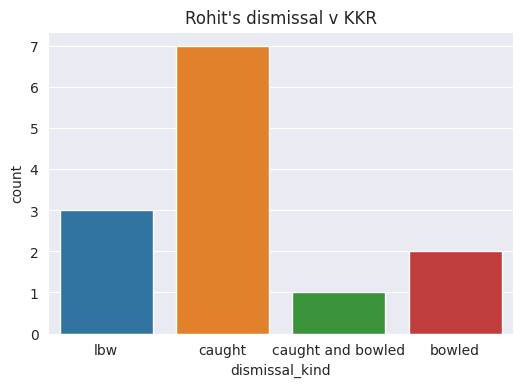

In [50]:
plt.figure(dpi=100)
sns.countplot(x=data_b.dismissal_kind, data=data_b)
plt.title('Rohit\'s dismissal v KKR')
plt.show()


Let's mark Caught

Thank You again for this amazing internship.

Looking forward to it tomorrow.

Regards,

Ashaab Rizvi

